In [42]:
#Predict the percentage of an student based on the no. of study hours. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random

import warnings
warnings.filterwarnings('ignore')

In [3]:
body=pd.read_csv(r"F:\Intership\score.csv")
body

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
body.shape

(25, 2)

In [5]:
body.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
body.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
body.dtypes

Hours     float64
Scores      int64
dtype: object

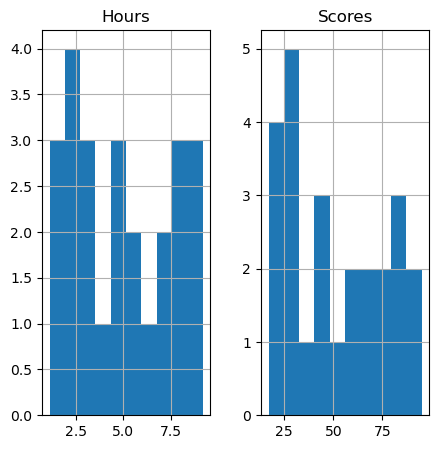

In [14]:
body.hist(figsize=(5,5))
plt.show()

<AxesSubplot:>

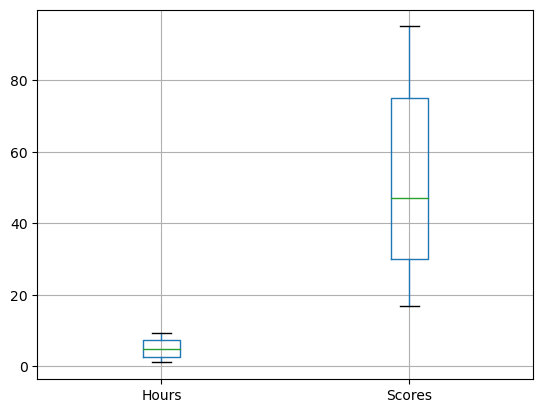

In [15]:
body.boxplot()

In [23]:
body_x = body.iloc[:, :-1].values  
body_y = body.iloc[:, 1].values

In [24]:
import sklearn
from sklearn.model_selection import train_test_split

In [25]:
b_x_train,b_x_test,b_y_train,b_y_test=train_test_split(body_x,body_y,test_size=0.2,random_state=101)

In [26]:
b_x_train.shape,b_x_test.shape,b_y_train.shape,b_y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [27]:
from sklearn import linear_model
lin=linear_model.LinearRegression()

In [28]:
lin.fit(b_x_train,b_y_train)

LinearRegression()

In [29]:
lin_p=lin.predict(b_x_test)
lin_p

array([26.84539693, 77.45859361, 39.4986961 , 74.53860149, 56.04531809])

In [30]:
lin.coef_

array([9.73330705])

In [31]:
lin.intercept_

2.512129298320083

In [32]:
R2=lin.score(b_x_train,b_y_train)
R2

0.954930331163377

In [33]:
Adj_R2=1-(((1-R2)*(20-1))/(20-5-1))
Adj_R2

0.9388340208645831

In [34]:
from sklearn import metrics

In [35]:
mse=metrics.mean_squared_error(b_y_test,lin_p)
mse

26.675642597052235

In [36]:
#RMSE,MAPE

rmse=pow(mse,0.5)
rmse

5.164846812544612

In [37]:
df1=pd.DataFrame({"Actual":b_y_test,"Predicted":lin_p})
df1

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


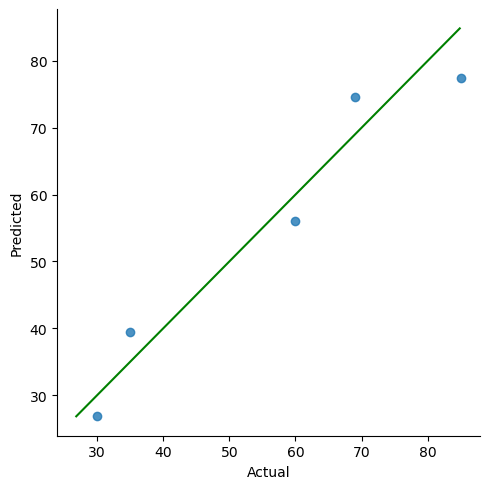

In [38]:
sns.lmplot(x="Actual",y="Predicted",data=df1,fit_reg=False)
d_line=np.arange(df1.min().min(),df1.max().max())
plt.plot(d_line,d_line,color="green",linestyle="-")
plt.show()

In [41]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(b_y_test, lin_p)) 

Mean Absolute Error: 4.937597792467705
